In [1]:
#Importing library yang akan digunakan
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#load dataset
irisDataset = pd.read_csv("Iris.csv", sep=',', skiprows=0)
irisDataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


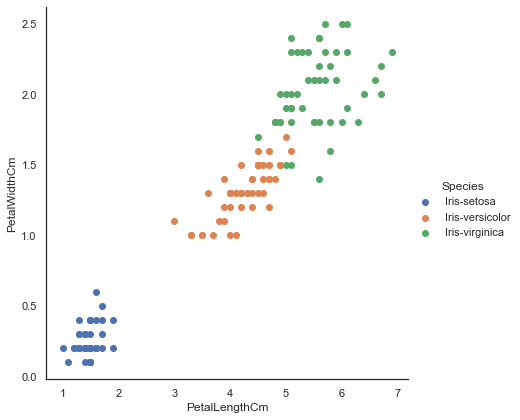

In [3]:
#Visualisasi Data
sns.set(style="white", color_codes=True)
sns.FacetGrid(irisDataset, hue="Species", size=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

In [4]:
#Memisahkan atribut dengan target class 
X = irisDataset.iloc[:, 1:5].values
y = irisDataset["Species"].values
print("Atribut Dataset :")
print(X)
print("Class Target Dataset :")
print(y)

Atribut Dataset :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

In [5]:
#Spliting data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Data Training: ")
print(x_train)
print(len(x_train))
print("Label Data Training: ")
print(y_train)
print(len(y_train))
print("Data Testing: ")
print(x_test)
print(len(x_test))
print("Label Data Testing: ")
print(y_test)
print(len(y_test))

Data Training: 
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0

In [6]:
#Normalisasi dataset 
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
print("Data Training Setelah Normalisasi Dataset :")
print(X_train)
print("Data Testing Setelah Normalisasi Dataset :")
print(X_test)

Data Training Setelah Normalisasi Dataset :
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]
 [ 0.59831066 -1.25412249  0.72966956  0.95628954]
 [ 0.72020757  0.32056046  0.44296246  0.42316645]
 [-0.74255534  0.99542457 -1.27728011 -1.30948358]
 [-0.98634915  1.22037928 -1.33462153 -1.30948358]
 [-0.74255534  2.34515281 -1.27728011 -1.44276436]
 [-0.01117388 -0.80421307  0.78701097  0.95628954]
 [ 0.23261993  0.77046987  0.44296246  0.55644722]
 [ 1.08589829  0.09560575  0.5576453   0.42316645]
 [-0.49876152  1.8952434  -1.39196294 -1.04292204]
 [-0.49876152  1.44533399 -1.27728011 -1.30948358]
 [-0.37686461 -1.47907719 -0.01576889 -0.24323741]
 [ 0.59831066 -0.57925837  0.78701097  0.42316645]
 [ 0.72020757  0.09560575  1.01637665  0.82300877]
 [ 0.96400139 -0.12934896  0.38562104 

In [7]:
#Training NBC Model 
model = GaussianNB()
model.fit(X_train, y_train)
print("Proses Training Selesai!")

Proses Training Selesai!


In [8]:
#Melakukan testing terhadap model NBC
y_pred = model.predict(X_test)
print("Hasil Prediksi Data Testing Menggunakan NBC :")
print(y_pred)

Hasil Prediksi Data Testing Menggunakan NBC :
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [9]:
#Melakukan perbandingan hasil prediksi label dengan data label asli
compare = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
print("Perbandingan Hasil Prediksi :")
print(compare)

Perbandingan Hasil Prediksi :
        Real Values Predicted Values
0   Iris-versicolor  Iris-versicolor
1       Iris-setosa      Iris-setosa
2    Iris-virginica   Iris-virginica
3   Iris-versicolor  Iris-versicolor
4   Iris-versicolor  Iris-versicolor
5       Iris-setosa      Iris-setosa
6   Iris-versicolor  Iris-versicolor
7    Iris-virginica   Iris-virginica
8   Iris-versicolor  Iris-versicolor
9   Iris-versicolor  Iris-versicolor
10   Iris-virginica   Iris-virginica
11      Iris-setosa      Iris-setosa
12      Iris-setosa      Iris-setosa
13      Iris-setosa      Iris-setosa
14      Iris-setosa      Iris-setosa
15  Iris-versicolor  Iris-versicolor
16   Iris-virginica   Iris-virginica
17  Iris-versicolor  Iris-versicolor
18  Iris-versicolor  Iris-versicolor
19   Iris-virginica   Iris-virginica
20      Iris-setosa      Iris-setosa
21   Iris-virginica   Iris-virginica
22      Iris-setosa      Iris-setosa
23   Iris-virginica   Iris-virginica
24   Iris-virginica   Iris-virginica
25   Iri

In [10]:
#Hasil akurasi testing
prediksiBenar = (y_pred == y_test).sum()
prediksiSalah = (y_pred != y_test).sum()
print("Prediksi Benar : ", prediksiBenar, "data")
print("Prediksi Salah : ", prediksiSalah, "data")
akurasi = prediksiBenar/(prediksiBenar+prediksiSalah)
print("Akurasi Model : ", akurasi)

Prediksi Benar :  30 data
Prediksi Salah :  0 data
Akurasi Model :  1.0


In [11]:
#condfusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['True : Iris-setosa', 'True : Iris-versicolor', 'True : Iris-virginica'],
    columns=['Pred : Iris-setosa', 'Pred : Iris-versicolor', 'Pred : Iris-virginica'],
)

,Pred : Iris-setosa,Pred : Iris-versicolor,Pred : Iris-virginica
True : Iris-setosa,10,0,0
True : Iris-versicolor,0,9,0
True : Iris-virginica,0,0,11


In [12]:
#Contoh memprediksi 1 data
data = np.zeros((1, 4), dtype=float)
for x in range(4):
    if x == 0:
        print("Masukan nilai sepal length (cm) : ")
        a = float(input())
        data[0][x] = a
    elif x == 1:
        print("Masukan nilai sepal width (cm) : ")
        a = float(input())
        data[0][x] = a
    elif x == 2:
        print("Masukan nilai sepal length (cm) : ")
        a = float(input())
        data[0][x] = a
    elif x == 3:
        print("Masukan nilai sepal length (cm) : ")
        a = float(input())
        data[0][x] = a
print("Data yang ingin diprediksi : ", data)
data = sc.transform(data)
print("Hasil Normalisasi Data : ", data)

#Klasifikasi data
prediction = model.predict(data)
print("Hasil Prediksi : ", prediction)

Masukan nilai sepal length (cm) : 
Masukan nilai sepal width (cm) : 
Masukan nilai sepal length (cm) : 
Masukan nilai sepal length (cm) : 
Data yang ingin diprediksi :  [[4.5 3.5 1.  0.2]]
Hasil Normalisasi Data :  [[-1.5958337   0.99542457 -1.5639872  -1.30948358]]
Hasil Prediksi :  ['Iris-setosa']
